In [92]:
from pyrpl import Pyrpl
from pyrpl.async_utils import sleep

import numpy as np

from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt

In [83]:
p = Pyrpl(config="fiber_interferometer")
r = p.rp

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    C:\Users\Circular\pyrpl_user_dir\config\fiber_interferometer.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe fiber_interferometer" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('fiber_interferometer')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname 10.0.5.11.


In [84]:
FIBER_LENGTH_MEAN = 0.5
FIBER_LENGTH_MODULATION_AMPLITUDE = FIBER_LENGTH_MEAN
FIBER_LENGTH_MODULATION_FREQUENCY = 1e3

In [89]:
r.scope.input1 = 'out2'
r.scope.input2 = 'iq0'
r.scope.decimation = 256 # 128
r.scope.trigger_source = 'ch1_positive_edge'
r.scope.threshold = 0.01
r.scope.hysteresis = 0.067626953125
r.scope.trace_average =1

r.asg0.waveform = 'sin'
r.asg0.offset = FIBER_LENGTH_MEAN
r.asg0.amplitude = FIBER_LENGTH_MODULATION_AMPLITUDE
r.asg0.frequency = FIBER_LENGTH_MODULATION_FREQUENCY
r.asg0.trigger_source = 'immediately'

r.iq0.input = 'in2'
r.iq0.output_direct = 'out2'
r.iq0.frequency = FIBER_LENGTH_MODULATION_FREQUENCY
r.iq0.acbandwidth = 607
r.iq0.bandwidth = [0, 1214.2929101024397]
r.iq0.quadrature_factor = 60.0
r.iq0.gain = 510.0

INFO:pyrpl.modules:Calling setup() for scope.decimation ...


In [117]:
def run_experiment():
    trace = r.scope.curve_async()
    sleep(1)
    return trace.result()

def plot_results(transmission, error):
    times = r.scope.times
    frequencies = fftfreq(times.size, d=times[1]-times[0])
    transmission_ft = np.abs(fft(transmission))

    plt.plot(times, transmission)
    plt.ylim(-0.25, 0.25)
    plt.title("Transmission")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    display(plt.show())

    plt.plot(times, error)
    plt.plot(times, np.full(times.size, np.mean(error)))
    plt.ylim(-0.1, 0.1)
    plt.title("Error")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    display(plt.show())

    plt.plot(frequencies, transmission_ft)
    plt.xlim(500, 1500)
    plt.ylim(0, 1000)
    plt.title("Transmission")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (V)")
    display(plt.show())

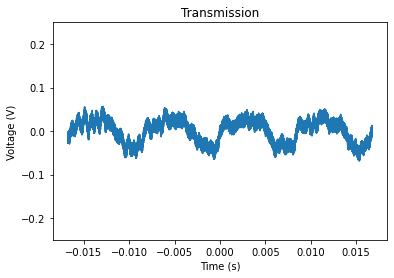

None

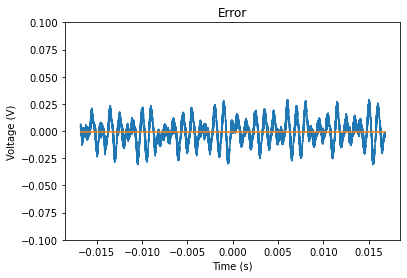

None

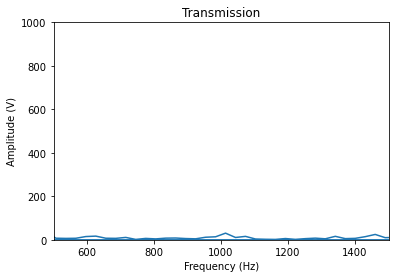

None

In [118]:
r.asg0.output_direct = 'off'

transmission, error = run_experiment()
plot_results(transmission, error)

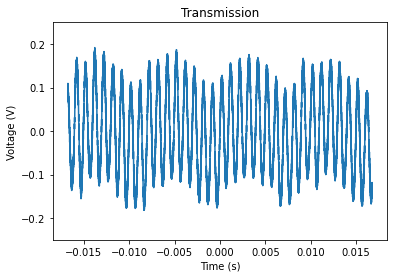

None

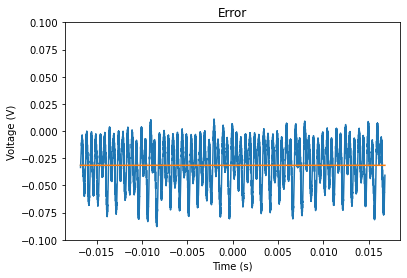

None

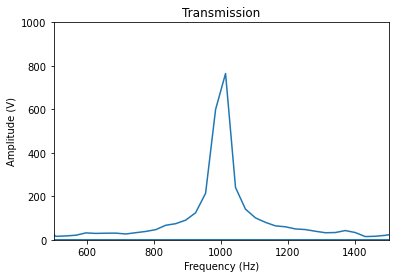

None

In [119]:
r.asg0.output_direct = 'out1'

transmission, error = run_experiment()
plot_results(transmission, error)